# Marketing and Retail Analytics - Capstone Project

OList is one such e-commerce company that has faced some losses recently and they want to manage
their inventory very well so as to reduce any unnecessary costs that they might be bearing.

In this assignment, We need to manage the inventory cost of this e-commerce company OList. 
We need to identify top products that contribute to the revenue and also use market basket 
analysis to analyse the purchase behaviour of individual customers to estimate with relative
certainty, what items are more likely to be purchased individually or in combination with some
other products.

**Project pipeline**

**Data exploration and cleaning:**
                               *Identify missing and duplicate values in each column and treat them 
                               accordingly. Also, treat any and all data quality issues associated 
                               with the dataset.*
            
**Data visualisation:**
                     *Create appropriate visualisations to identify the most ordered products by    
                      quantity and revenue.*
        
**Market basket analysis:**
                      *Identify combinations of product categories that are ordered frequently
                      and visualise them as required. This can be done by creating a simple matrix 
                      with product categories in the rows and columns and then checking which of the
                      pairs show associations.*
                
    

## **PROJECT TASK 1 : Data Exploration And Cleaning**

In [1]:
# Importing necessary libraries,Reading Data and Data Inspection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Reading the Excel Sheet "Orders"

In [2]:
# Reading the orders sheet
orders = pd.read_excel("Retail_dataset.xlsx", sheet_name="orders")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [3]:
#Checking the shape
orders.shape

(99441, 7)

In [4]:
#Checking if Order_id unique/duplicated
orders.order_id.duplicated().sum()

0

In [5]:
#Considering the sucessfully delivered orders [Order_status as "delivered"]
orders = orders[orders.order_status == "delivered"]
orders.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

In [6]:
#Checking the shape
orders.shape


(96478, 7)

In [7]:
#Checking for missing values
orders.isna().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [8]:
#Two columns having null values are order_approved_at and order_delivered_timestamp. Need to impute the null values.

#Condering  order_approved_at is the same time as order_purchare_timestamp.
#Considering  order_delivered_timestamp is the same as order_estimated_delivery_date.

In [9]:
#Imputing the null values of the above mentioned two columns

orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace=True)
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [10]:
#Checking for missing values again
orders.isna().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

#### Reading the Excel Sheet "Order Items"

In [11]:
## Reading the order items sheet
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name="order_items")
order_items.head()


,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [12]:
#Checking the shape
order_items.shape

(112650, 6)

In [13]:
#Checkign for null values
order_items.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [14]:
# checking the rows
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


#### Reading the  Sheet "Customers"


In [15]:
# Reading the customers sheet
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name = "customers")

In [16]:
#Checking the shape
customers.shape

(99441, 4)

In [17]:
# checking null values
customers.isna().sum().sort_values(ascending = False)

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [18]:
# checking for duplicate customer_id
customers.customer_id.duplicated().sum()

3345

In [19]:
customers[ customers.customer_id.duplicated() ]


,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [20]:
customers[ customers.customer_id.duplicated() ].shape

(3345, 4)

In [21]:
# Dropping the duplicate customers and keeping only the first
customers.drop_duplicates(subset="customer_id", keep="first", inplace = True)

In [22]:
# checking the shape 
customers.shape

(96096, 4)

In [23]:
# checking for duplicates in customer_id after dropping
customers.customer_id.duplicated().sum()

0

#### Reading the  Sheet "Payments"

In [24]:
# Reading the payments sheet
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name="payments")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [25]:
#Checking the shape
payments.shape

(103886, 5)

In [26]:
#Checking for null values
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### Reading the Sheet "Products"

In [27]:
#Reading the Sheet "Payments" 
products = pd.read_excel("Retail_dataset.xlsx", sheet_name="products")
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [28]:
# checking the shape
products.shape

(32951, 6)

In [29]:
# checking if any null values present
products.isna().sum().sort_values(ascending = False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [30]:
#Columns having null values are product_category_name, product_weight_g, product_length_cm, product_height_cm and product_width_cm.
#Imputing the null values in product_category_name with the mode of the column.
#Imputing the null values of the remaiming columns by checking the skewness of the data in the column.

In [31]:
# checking the mode of the product_category_name column
products["product_category_name"].mode()[0]

'toys'

In [32]:
# We will imputing the null values of the product_category_name column with 'toys' which is the mode of the column
products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace = True)

In [33]:
# checking null values once again
products.isna().sum().sort_values(ascending = False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [34]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [35]:
# We will check the statistical values of the numerical columns in "products"
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


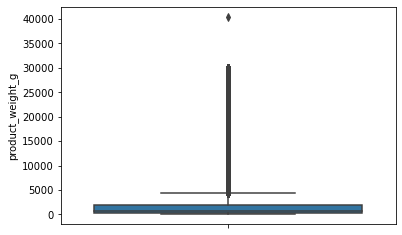

In [36]:
sns.boxplot(y= products.product_weight_g);

In [37]:
products.product_weight_g.median()



700.0

In [38]:
products.product_length_cm.median()



25.0

In [39]:
products.product_height_cm.median()



13.0

In [40]:
products.product_width_cm.median()

20.0

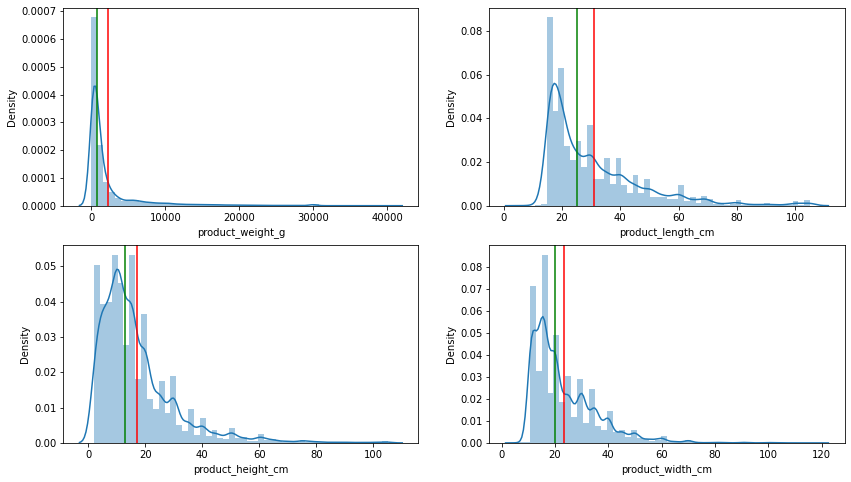

In [41]:
# checking skewness of the data
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="red")
plt.axvline(products.product_weight_g.median(), color="green")

plt.subplot(2,2,2)
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(), color="red")
plt.axvline(products.product_length_cm.median(), color="green")

plt.subplot(2,2,3)
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(), color="red")
plt.axvline(products.product_height_cm.median(), color="green")

plt.subplot(2,2,4)
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(), color="red")
plt.axvline(products.product_width_cm.median(), color="green")

plt.show()

In [42]:
# iImpute null values with median of columns, since there is normal skewness
products.product_weight_g.fillna(products.product_weight_g.median(), inplace = True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace = True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace = True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace = True)

In [43]:
# checking null values after imputing 
products.isna().sum().sort_values(ascending = False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

### ** Export the cleaned dataset to start  analysis on Tableau**

In [44]:
# create a Pandas Excel writer using XlsxWriter as the engine
Market = pd.ExcelWriter("Retail_dataset_new.xlsx", engine = 'xlsxwriter')

In [45]:
orders.to_excel(Market, sheet_name = "order", index = False)
order_items.to_excel(Market, sheet_name = "order_items", index = False)
customers.to_excel(Market, sheet_name = "customers", index = False)
payments.to_excel(Market, sheet_name = "payments", index = False)
products.to_excel(Market, sheet_name = "products", index = False)

In [46]:
Market.save()
print("Files exported successfully.")

Files exported successfully.


In [47]:
# check if the export was successful
import os
os.getcwd()

'C:\\Users\\hp'

### Cleaned dataset to build necessary visualizations in Tableau


# Market Basket Analysis

In [48]:
#Market Basket Analysis helps to identify combinations of product categories that are ordered frequently. This is done by creating a simple matrix with product categories in the rows and columns and then checking which of the pairs show associations.

#For Market Basket Analysis ,We will use the cleaned dataset .

In [49]:
# reading order_items sheet
df1 = pd.read_excel("Retail_dataset_new.xlsx", sheet_name = "order_items")

In [50]:
df1.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [51]:
df1.shape

(112650, 6)

In [52]:
# reading products sheet
df2 = pd.read_excel("Retail_dataset_new.xlsx", sheet_name = "products")

In [53]:
df2.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,baby,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,housewares,625,20,17,13


In [54]:
df2.shape

(32951, 6)

In [55]:
# Merge both the dataframes using the  column product_id
df = pd.merge(df1, df2, on = "product_id", how = "inner", indicator = True)

In [56]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650,28,9,14,both
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650,28,9,14,both
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650,28,9,14,both
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14,both


In [57]:
df.shape

(112650, 12)

For further  analysis we need to consider  order_id and product_category_name

In [58]:
# Filtering the dataframe to two columns
df = df[["order_id", "product_category_name"]]
df.head()

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,toys
1,130898c0987d1801452a8ed92a670612,toys
2,532ed5e14e24ae1f0d735b91524b98b9,toys
3,6f8c31653edb8c83e1a739408b5ff750,toys
4,7d19f4ef4d04461989632411b7e588b9,toys


In [59]:
#Checking the shape after filtering
df.shape


(112650, 2)

In [60]:
# create a Pandas Excel writer using XlsxWriter as the engine
Market_Basket = pd.ExcelWriter("Market_Basket_Analysis.xlsx", engine = 'xlsxwriter')

In [64]:

df.to_excel(Market_Basket, sheet_name = 'order_prod', index = False)

In [62]:
Market_Basket.save()
print("Files exported successfully.")

Files exported successfully.


In [63]:
# check if the export was successful
import os
os.getcwd()

'C:\\Users\\hp'

### We will use this dataset to peform Market Basket Analysis and check the product category association in Tableau